In [5]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from sipbuild.generator import outputs
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [12]:
data_path = '../Week 4'

transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
train_dataset = torchvision.datasets.ImageFolder(data_path, transform=transform)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

print(len(train_dataset))

100


something wrong completion with ERROR > EPS and MAXPTS function values used;
                    increase MAXPTS to decrease ERROR; 1.1025973928064193e-06
[0.322223247638366, 0.3414637955903903, 0.5450261728762811, 0.31163204518848475]

0.322879
[0.322879 0.341722 0.545742 0.312122]
0.32543
[0.32345 0.34433 0.54361 0.31376]
[-1.  0.]
[[1.  0.5]
 [0.5 1.5]]
[-1.75 -0.6 ]
[[0.71875 0.275  ]
 [0.275   1.32   ]]
[-1.625]
[[0.66145833]]
[1. 1. 1. ... 1. 1. 1.]
[-1.625]
[ 2.0532035   0.4041706  -0.59346555 ...  3.87976903  4.15126387
  5.4071344 ]
[-1.10416667]
0.30267520036220175
0.30408
R 0.3026741
R 0.3026855
diff -1.029963779825005e-05
0.19461625422975962
0.19379
R 0.1946621
R 0.1946217
diff -5.445770240392056e-06


AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute 'next'

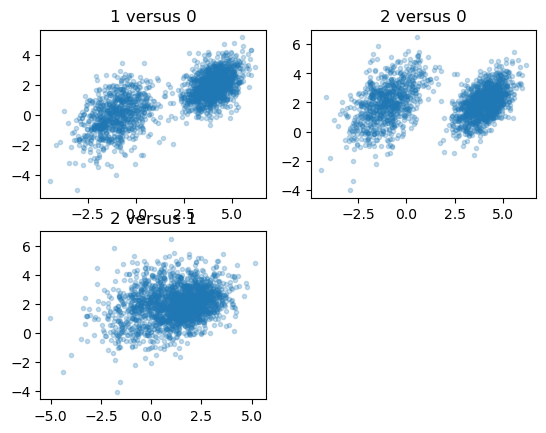

In [13]:
import numpy as np
from statsmodels.sandbox.distributions.examples.ex_mvelliptical import fig

samples, labels = iter(train_loader).next()
classes = {0:'cat', 1:'dog'}
flg = plt.figure(figsize=(16, 24))
for i in range(24):
    a = fig.add_subplot(4, 6, i+1)
    a.set_title(classes[labels[i]].item())
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [14]:
resnet18 = models.resnet18(pretrained=True)

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/cakenpeace/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 27.6MB/s]


In [15]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

set_parameter_requires_grad(resnet18)

In [16]:
resnet18.fc = nn.Linear(512, 2)

In [17]:
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc.weight tensor([[ 0.0426, -0.0011, -0.0370,  ..., -0.0007,  0.0359, -0.0167],
        [-0.0254,  0.0307, -0.0307,  ..., -0.0050, -0.0139,  0.0298]])
fc.bias tensor([-0.0200, -0.0182])


In [18]:
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_Train=True):
    since = time.time()
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        
        print("Loss: {:.4f} Acc: {:.4f}".format(epoch_loss, epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            
        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        torch.save(model.state_dict(), os.path.join('./', '{0:0=2d}.pth'.format(epoch)))
        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc:{:.4f}'.format(best_acc))
    return acc_history, loss_history

In [21]:
params_to_update = []
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        params_to_update.append(param)
        print("\t", name)
optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_lost_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.2471 Acc: 0.9500

Epoch 1/12
----------
Loss: 0.0174 Acc: 1.0000

Epoch 2/12
----------
Loss: 0.0030 Acc: 1.0000

Epoch 3/12
----------
Loss: 0.0010 Acc: 1.0000

Epoch 4/12
----------
Loss: 0.0005 Acc: 1.0000

Epoch 5/12
----------
Loss: 0.0004 Acc: 1.0000

Epoch 6/12
----------
Loss: 0.0002 Acc: 1.0000

Epoch 7/12
----------
Loss: 0.0003 Acc: 1.0000

Epoch 8/12
----------
Loss: 0.0002 Acc: 1.0000

Epoch 9/12
----------
Loss: 0.0004 Acc: 1.0000

Epoch 10/12
----------
Loss: 0.0001 Acc: 1.0000

Epoch 11/12
----------
Loss: 0.0001 Acc: 1.0000

Epoch 12/12
----------
Loss: 0.0005 Acc: 1.0000

Training complete in 6m 30s
Best Acc:1.0000


In [24]:
test_path = './'

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

100


In [27]:
def eval_model(model, dataloaders, device):
    since = time.time()
    acc_history = []
    best_acc = 0.0
    
    saved_models = glob.glob('./' + '*.pth')
    saved_models.sort()
    print('saved_models', saved_models)
    
    for model_path in saved_models:
        print('Loading model', model_path)
        
        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            with torch.no_grad():
                outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.eq(labels.data).cpu().int().sum()
            
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
        acc_history.append(epoch_acc.item())
        print()
        
    time_elapsed = time.time() - since
    print('Validation complete in {:0f}m {:0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:.4f}'.format(best_acc))
    
    return acc_history

In [28]:
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_models ['./00.pth', './01.pth', './02.pth', './03.pth', './04.pth', './05.pth', './06.pth', './07.pth', './08.pth', './09.pth', './10.pth', './11.pth', './12.pth']
Loading model ./00.pth
Acc: 1.0000

Loading model ./01.pth
Acc: 1.0000

Loading model ./02.pth
Acc: 1.0000

Loading model ./03.pth
Acc: 1.0000

Loading model ./04.pth
Acc: 1.0000

Loading model ./05.pth
Acc: 1.0000

Loading model ./06.pth
Acc: 1.0000

Loading model ./07.pth
Acc: 1.0000

Loading model ./08.pth
Acc: 1.0000

Loading model ./09.pth
Acc: 1.0000

Loading model ./10.pth
Acc: 1.0000

Loading model ./11.pth
Acc: 1.0000

Loading model ./12.pth
Acc: 1.0000

Validation complete in 2.000000m 36.329230s
Best Acc: 1.0000


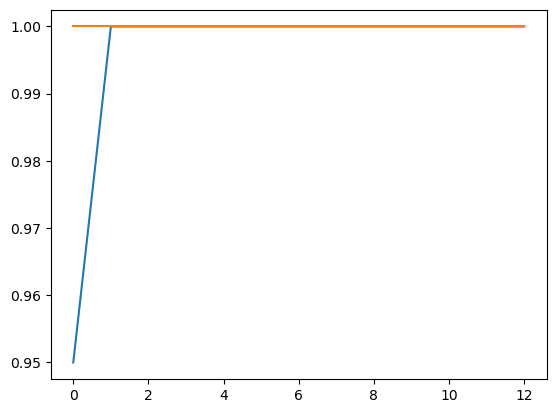

In [29]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

In [30]:
plt.plot(train_loss_hist)
plt.show()

NameError: name 'train_loss_hist' is not defined

In [31]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose((1, 2, 0))
    image = image * (np.array((0.5, 0.5, 0.5))) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [32]:
classes = {0:'cat', 1:'dog'}

dataiter = iter(test_loader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    a.set_title(classes[labels[i].item()])
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=('green' if labels[idx].item()==1 else 'red'))
plt.show()
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute 'next'

In [34]:
from PIL import Image
import torch.nn.functional as F
from torchvision.transforms import ToTensor


In [35]:
class XAI(torch.nn.Module):
    def __init__(self, num_classes=2):
        super(XAI, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(128, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512, 512, bias=False),
            nn.Dropout(0.5),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x)

In [36]:
model = XAI()
model.to(device)
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

In [37]:
class LayerActivations:
    features = []
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
        
    def hook_fn(self, module, input, output):
        self.features = output.detach().numpy()
    
    def remove(self):
        self.hook.remove()

torch.Size([1, 3, 100, 100])


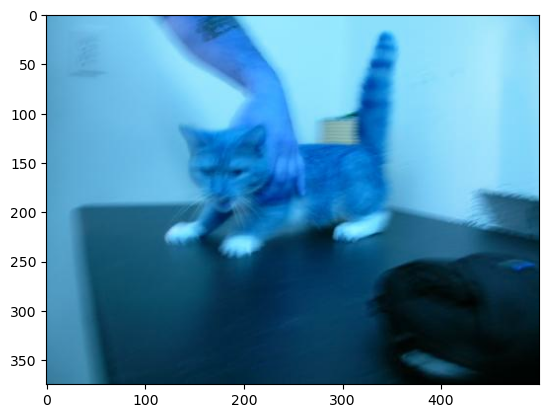

In [38]:
img = cv2.imread('./data/0.jpg')
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)
print(img.shape)

In [39]:
result = LayerActivations(model.features, 0)

model(img)
activations = result.features

/var/folders/1k/zblhw3qd3j9b3j_dfxr9lnl80000gn/T/ipykernel_58829/657782013.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


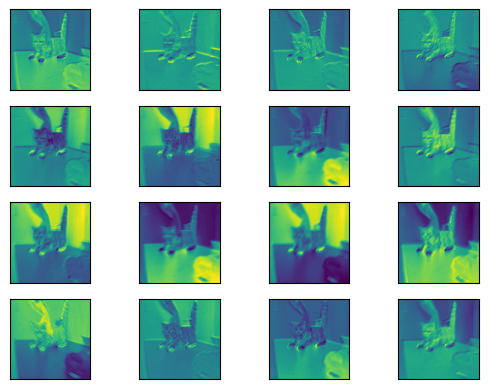

<Figure size 1200x800 with 0 Axes>

In [40]:
fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

In [41]:
result = LayerActivations(model.features, 20)

model(img)
activations = result.features

/var/folders/1k/zblhw3qd3j9b3j_dfxr9lnl80000gn/T/ipykernel_58829/657782013.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/connect

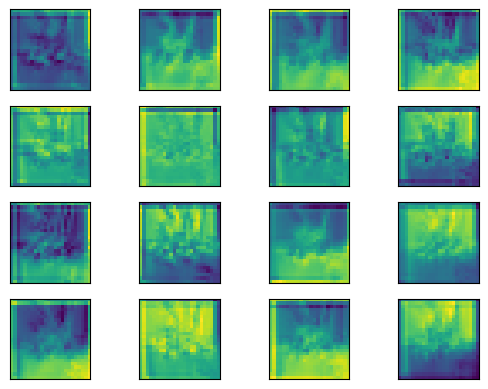

<Figure size 1200x800 with 0 Axes>

In [42]:
fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

In [43]:
result = LayerActivations(model.features, 40)

model(img)
activations = result.features

/var/folders/1k/zblhw3qd3j9b3j_dfxr9lnl80000gn/T/ipykernel_58829/657782013.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


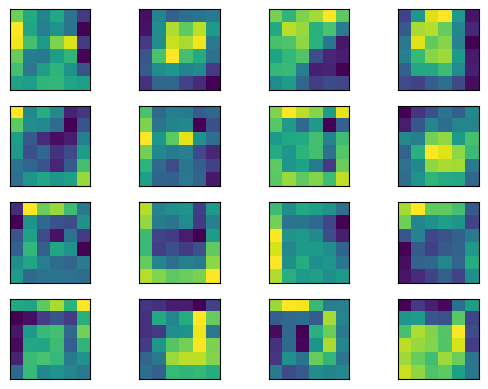

<Figure size 1200x800 with 0 Axes>

In [44]:
fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()